<h1><center> Traffic Accidents in the USA (2016 to 2019)</center></h1>

<h3><center>A Panda's / Python driven analysis</center></h3>

Traffic accidents are often a frequent reminder of the daily dangers of travelling. In the USA alone, there are currently 222 million people registered with a drivers licence as of 2016 [Link](https://www.statista.com/topics/1197/car-drivers/), there are about 0.2 deaths per 10 billion passenger-miles [Link](https://www.bts.gov/archive/publications/transportation_statistics_annual_report/2015/tables/ch6/table6_1). 


For my analysis, I utilised three sources of data. 
- US Accidents (3.0 million records) from Kaggle.com.  [Link](https://www.kaggle.com/sobhanmoosavi/us-accidents)
- "Seat belts laws in United States" from Wikipedia.  [Link](https://en.wikipedia.org/wiki/Seat_belt_laws_in_the_United_States)
- TMC Event Codes from OpenStreetMap. [Link](https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List)

In this paper, I will describe how I processed the data, the questions I asked and answered throughout the process and given more time, what I'd like to explore further in the future.

In [53]:
from IPython.display import Image

### Part One - Data Preparation and Cleaning

After importing the appropiate libraries such as Pandas, Numpy, Matplotlib, Seaborn and Scipy,
I imported the dataset to get an idea of what I'm working with. The dataset was one of the biggest
I've worked with yet (1gb), three million rows and 49 columns.

In [5]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


I began by converting the relevant columns to the correct datatype. 

In [6]:
data['Start_Time'].dtypes

dtype('O')

Here, I convert the entire Start Time column to a datatime format. I also normalize the
datetime to remove the hours / minutes / seconds elements as it is not required for 
all of the data analysis I planned. However, in some instances I bypass this function. 

In [7]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Start_Time'] = data['Start_Time'].dt.normalize()
data['Start_Time'].dtypes

dtype('<M8[ns]')

Here, I drop the majority of the columns I don't wish to investigate. This will made the dataset more
managable and less cumbersome to work with!

In [11]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
data_clean = data.drop(columns = ['End_Time', 'Temperature(F)', 'Wind_Chill(F)', 
                                  'End_Lat', 'End_Lng', 
                                  'Humidity(%)', 'Pressure(in)',
                                   'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
                                   'Precipitation(in)','Amenity', 'Bump', 'Crossing', 'Number',
                                  'Street', 'Side', 'City', 'County', 'State',
                                   'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
                                   'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
                                   'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
                                   'Astronomical_Twilight', 'Timezone','Airport_Code','Weather_Timestamp' ])

Below, we count the number of NaN values present in our dataset. There's quite a few! However, thankfully given the size of our dataset, we can drop these from the set and focus on the values that we have.

In [15]:
data_clean.isnull().sum()

ID                        0
Source                    0
TMC                  728071
Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Description               1
Zipcode                 880
Country                   0
Timezone               3163
Airport_Code           5691
Weather_Timestamp     36705
Weather_Condition     65932
dtype: int64

### Part Two - Sorting, Analysing

Here, I selected the dataframe so it's over a three year period. 

In [24]:
data_year = data[(data['Start_Time'] > '2016-08-23') &
                (data['Start_Time'] <= '2019-08-23')]

Next, I was interested in the meaning of the TMC column, and decided to utilise the TMC Event Codes from OpenStreetMap

In [25]:
traffic_codes = data_clean['TMC'].value_counts()
traffic_codes = pd.DataFrame(traffic_codes)
traffic_codes.reset_index()
traffic_codes.index.names = ['Code']
traffic_codes.head()

,TMC
Code,
201.0,1890037
241.0,219071
245.0,35919
229.0,22653
203.0,16792


In [26]:
event_codes = pd.read_html('https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List')
codes = event_codes[0].drop(columns = ['N','Q','T','D','U','C','R'])
df_codes = codes.merge(traffic_codes, left_on='Code', right_on='Code')
df_codes = df_codes.rename(columns = {'TMC':'# of Accidents'})
df_codes.sort_values(by = '# of Accidents',ascending = False).head(10)

,Code,Description,# of Accidents
1,201,(Q) accident(s),1890037
9,241,(Q) accident(s). Right lane blocked,219071
11,245,(Q) accident(s). Two lanes blocked,35919
6,229,(Q) accident(s). Slow traffic,22653
3,203,multi-vehicle accident (involving Q vehicles),16792
5,222,(Q) accident(s). Queuing traffic,12552
10,244,(Q) accident(s). Hard shoulder blocked,11163
20,406,(Q th) entry slip road closed,9467
12,246,(Q) accident(s). Three lanes blocked,6350
2,202,(Q) serious accident(s),6047


Whilst given that this is an accident dataset and that the most common description of the accident is "(Q) Accident(s)" is unsurprising, it's interesting to denote the use of the TMC as a way of providing quick information the to Police, Emergency Services etc. It also gives valuable traffic data in some instances such as how the road is affected.

-----------------------------------------------------------------------------

Below I've grouped the number of accidents that occur each day by their Severity.

In [27]:
severity_time = data_year[['Severity','Start_Time']]
severity_time['Start_Time'] = severity_time['Start_Time'].dt.date
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts()
sev_count = severity_time.groupby(severity_time['Start_Time'])['Severity'].value_counts().unstack(level = 1)
sev_count.reset_index(level=0, inplace=True)
sev_count.head()

C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Severity,Start_Time,1,2,3,4
0,2016-08-24,3.0,1606.0,634.0,74.0
1,2016-08-25,NaN,1364.0,652.0,62.0
2,2016-08-26,3.0,1572.0,680.0,73.0
3,2016-08-27,2.0,355.0,308.0,38.0
4,2016-08-28,2.0,326.0,298.0,61.0


In the following cells I group together data by state, severity, begin by correlating the Seatbelt useage data. One issue I overcame was that our Accidents data sets only express the names of states as their abbreviations, thus I matched the seatbelt datasets by merging datasets together in order to obtain the fullname, abbreviation, severity and seatbelt data into one set.

In [29]:
accidents_by_state = [data_year[data_year['State'] == i].count()['ID'] 
                      for i in data_year.State.unique()]
accidents_by_state.sort(reverse = True)
states = data_year.State.unique()
state_severity = data_year[['Severity', 'ID', 'State']]
grouped = state_severity.groupby(['State']).sum().reset_index()
sort_grouped = grouped.sort_values(by = 'Severity', ascending = False)
sort_grouped.head()

,State,Severity
3,CA,1107610
41,TX,583689
8,FL,456193
32,NY,284274
38,SC,272430


Here I import the data from the Wikipedia page which contains all the North American States, their long names and abbreviations. 

In [31]:
stateabbr = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')[0]
stateabbr.head()

Flag, name &postal abbreviation[12]                                        \
  Flag, name &postal abbreviation[12] Flag, name &postal abbreviation[12].1   
0                             Alabama                                    AL   
1                              Alaska                                    AK   
2                             Arizona                                    AZ   
3                            Arkansas                                    AR   
4                          California                                    CA   

        Cities              Ratificationor admission[C] Population[D][14]  \
       Capital  Largest[16] Ratificationor admission[C] Population[D][14]   
0   Montgomery   Birmingham                Dec 14, 1819           4903185   
1       Juneau    Anchorage                 Jan 3, 1959            731545   
2      Phoenix      Phoenix                Feb 14, 1912           7278717   
3  Little Rock  Little Rock                Jun 15, 1836           3017804   
4   Sacramento  Los Angeles                 Sep 9, 1850          39512223   

  Total area[15]          Land area[15]          Water area[15]          \
             mi2      km2           mi2      km2            mi2     km2   
0          52420   135767         50645   131171           1775    4597   
1         665384  1723337        570641  1477953          94743  245384   
2         113990   295234        113594   294207            396    1026   
3          53179   137732         52035   134771           1143    2961   
4         163695   423967        155779   403466           7916   20501   

  Numberof Reps.  
  Numberof Reps.  
0              7  
1              1  
2              9  
3              4  
4             53

In [32]:
state_list = stateabbr.values
state_list = pd.DataFrame(state_list)
state_list = state_list[[0,1]]
state_list = state_list.rename(columns = {0:'Long',1:'State'})
state_list.head()

,Long,State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Now, I import the Seatbelt data, clean it and begin to merge it with the State information.

In [34]:
df = pd.read_html('https://en.wikipedia.org/wiki/Seat_belt_laws_in_the_United_States')[0]
df = df.drop(['Type of law','Date of first law','Who is covered','Base fine before fees'], axis = 1)
df = df.rename(columns = {'State, federal district, or territory':'State','Seat Belt Usage (2017)[7][note 2]':'Seatbelt'})
df = df.drop(52) ### Wake Island has no data.
df.sort_values(by = 'Seatbelt', ascending = False).head()

,State,Seatbelt
11,Georgia,97.1%
13,Hawaii,96.9%
40,Oregon,96.8%
5,California,96.2%
53,Washington,94.8%


In [35]:
df_states = sort_grouped.merge(state_list, left_on='State', right_on='State')
df_states = df_states.rename(columns = {'State':'Abbv','Long':'State'})
df_states.head()

,Abbv,Severity,State
0,CA,1107610,California
1,TX,583689,Texas
2,FL,456193,Florida
3,NY,284274,New York
4,SC,272430,South Carolina


In [36]:
df_states_full = df_states.merge(df, left_on = 'State', right_on='State')
df_states_full = df_states_full[['Abbv','State','Severity','Seatbelt']]
df_states_full['Seatbelt'] = df_states_full['Seatbelt'].str.replace('%','')
df_states_full.sort_values(by = 'Severity', ascending = False).head()

,Abbv,State,Severity,Seatbelt
0,CA,California,1107610,96.2
1,TX,Texas,583689,91.9
2,FL,Florida,456193,90.2
3,NY,New York,284274,93.4
4,SC,South Carolina,272430,92.3


Finally, I clean the data and convert the values to the correct types, so then I can export the data into CSV and utilise in Tableau. 

In [37]:
df_states_full.Seatbelt = df_states_full.Seatbelt.astype(str).astype(float)
df_states_full.dtypes

Abbv         object
State        object
Severity      int64
Seatbelt    float64
dtype: object

The data is then further cleaned and grouped, so that I produce dataplots!

In [38]:
top_grouped = state_list.merge(sort_grouped, left_on='State', right_on='State')
top_grouped = top_grouped.sort_values(by = 'Severity', ascending = False)
top_grouped.Long = top_grouped.Long.str.replace(("[['E']]"),"")
top_grouped.head()

C:\Users\Gareth\Anaconda3\lib\site-packages\pandas\core\strings.py:713: FutureWarning: Possible nested set at position 1
  compiled = re.compile(pat, flags=flags)


,Long,State,Severity
3,California,CA,1107610
40,Texas,TX,583689
7,Florida,FL,456193
29,New York,NY,284274
37,South Carolina,SC,272430


-----------------------------------------------------------------------------

### Part Three: Data Visualisation

#### Accident Location Analysis

The dataset provided Longtitude and Latitude information for every single accident. I decided to use this information, combined with Tableau to produce a heatmap illustrating where the most accidents took place.

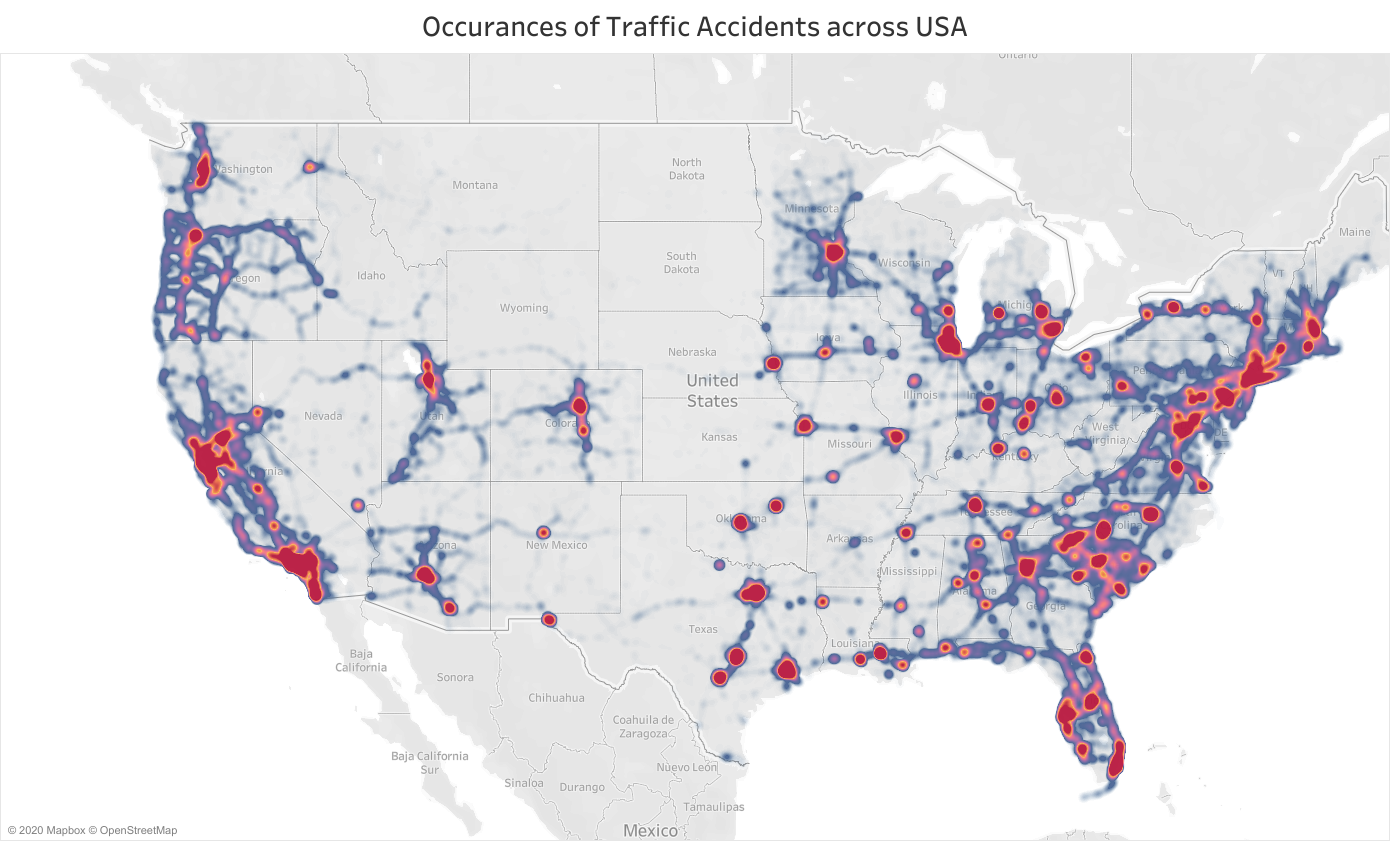

In [56]:
Image(filename = r'C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\your-project\Visuals\USA Heatmap.png')

As you can see, most traffic accidents tend to be along the West or East Coasts, centering typically around bigger cities.

It makes sense to further analyse this, so using the data I grouped together earlier, we began visualising the number of accidents by state.

Text(0, 0.5, 'State')

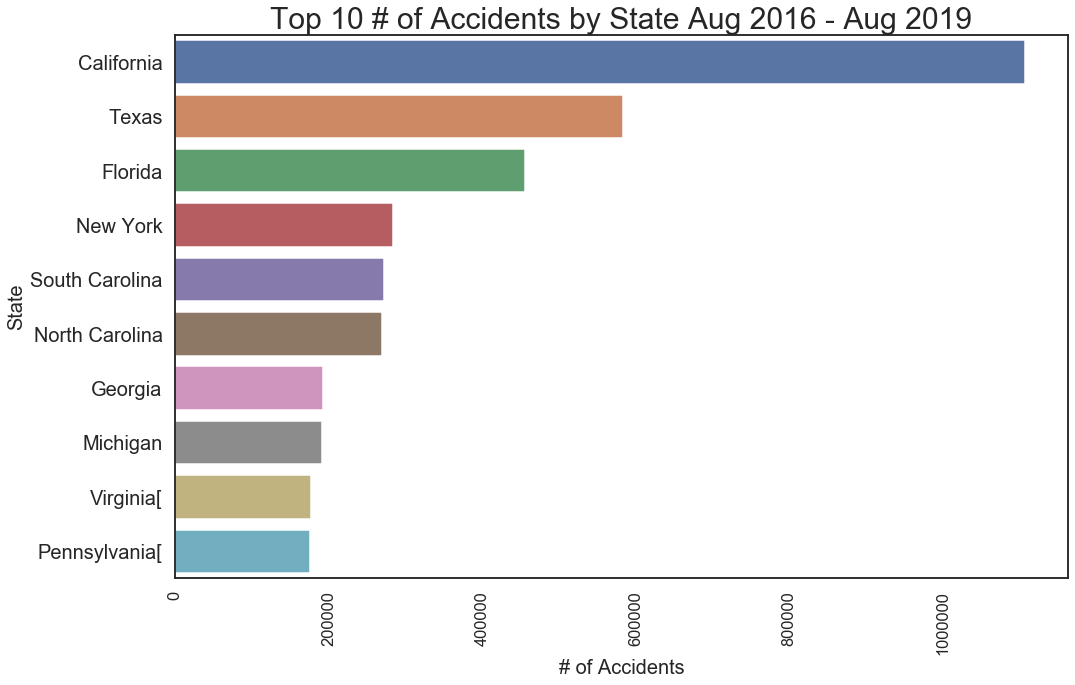

In [39]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = top_grouped['Severity'], y = top_grouped['Long'].head(10))
plt.xticks(rotation=90)
plt.yticks(fontsize = 20)
plt.title('Top 10 # of Accidents by State Aug 2016 - Aug 2019', fontsize = 30)
plt.xlabel('# of Accidents', fontsize = 20)
plt.ylabel('State', fontsize = 20)

The plot above demonstrates that the greatest number of accidents, irregardless of severity, take place in California, Texas and Florida.

However, further filtering of the data reveals some interesting insights.

In [41]:
severities4_state = data[data['Severity'] == 4]['State'].value_counts()
severities3_state = data[data['Severity'] == 3]['State'].value_counts()
severities2_state = data[data['Severity'] == 2]['State'].value_counts()
severities1_state = data[data['Severity'] == 1]['State'].value_counts()
names = ['Severity 4', 'Severity 3', 'Severity 2', 'Severity 1']

In [42]:
sever_df = pd.concat([severities4_state, severities3_state,
                     severities2_state, severities1_state],
                    axis = 1)
sever_df.columns = names
sever_df.head(10)
sever_df.fillna(0)
sever_df.reset_index(inplace = True)
sever_df = sever_df.rename(columns = {'index':'State'})
sever_df = sever_df.fillna(0)
sever_df_sort = sever_df.sort_values(by = 'Severity 4', ascending = False)

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1152x720 with 0 Axes>

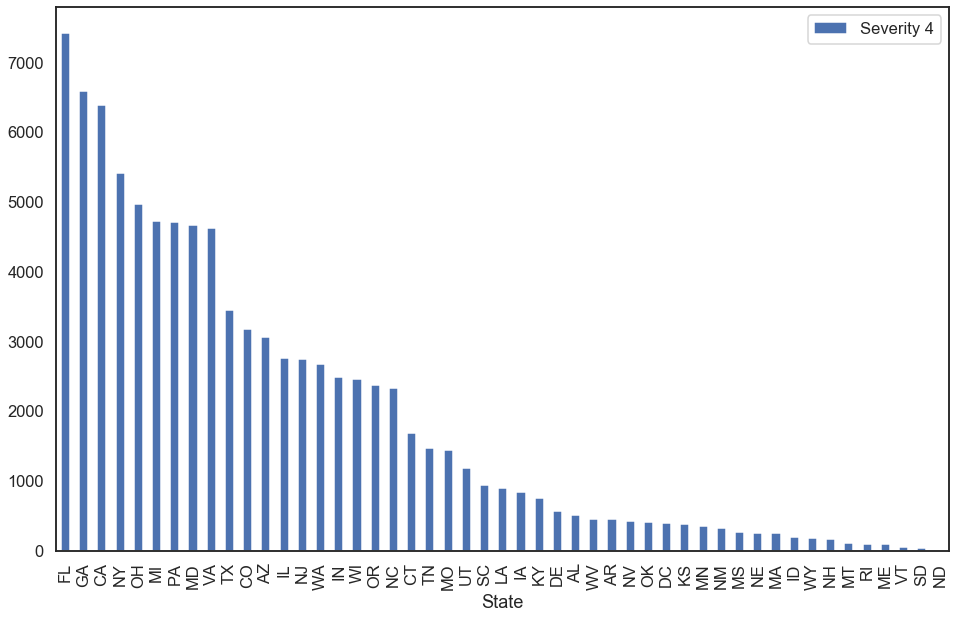

In [43]:
plt.figure(figsize=(16, 10))
ax = sever_df_sort.plot(x = 'State', y = 'Severity 4', kind = "bar", figsize = (16,10))
plt.show

#### As you can see above, Severity 4 accidents occur most frequently in Flordia, Georgia and California.

In order to improve the visuals further, I exported the data to a CSV and read it into tableau.

In [ ]:
sever_df_sort.to_csv('SeverityDatabase.csv')

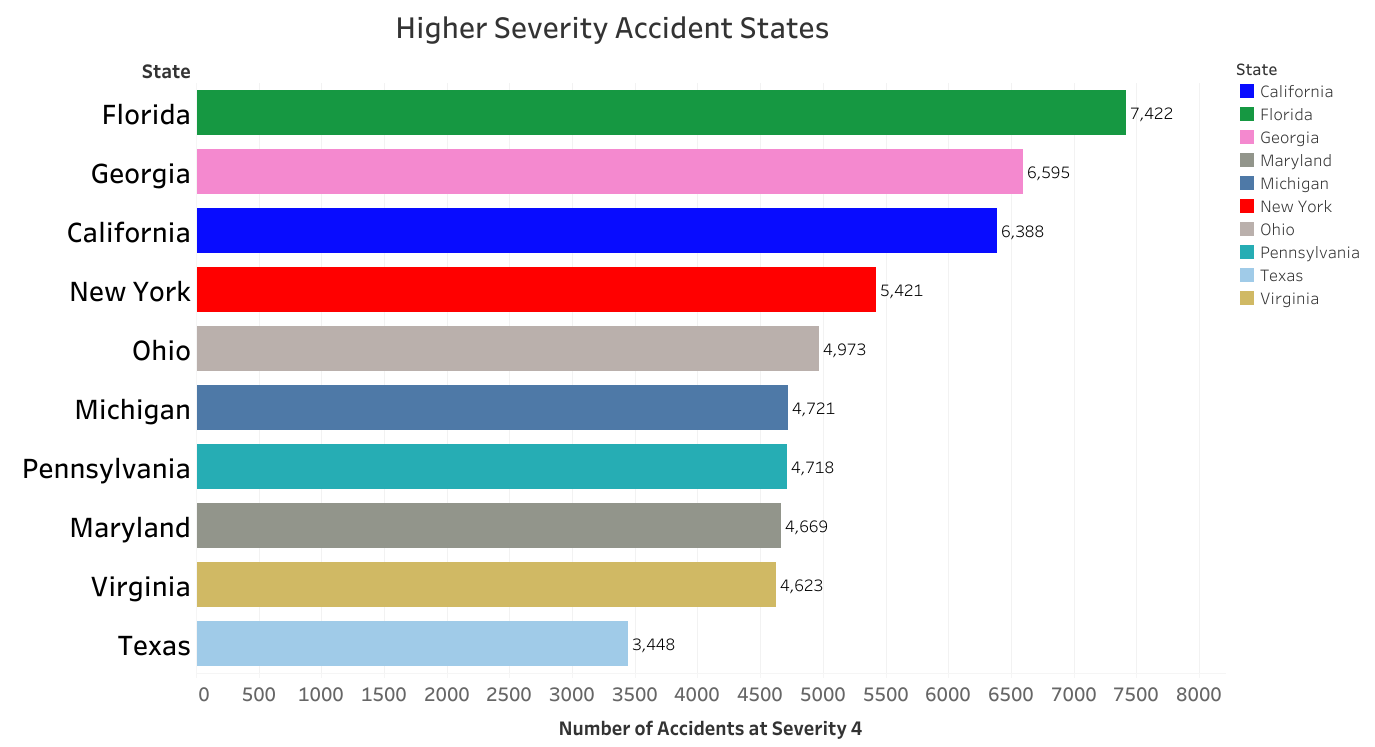

In [50]:
Image(filename = r'C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\your-project\Visuals\High Severity Accident States.png')

-----------------------------------------------------------------------------

#### Weather Analysis

Text(0.5, 1.0, 'Most Common Weather Conditions at the time of Accident')

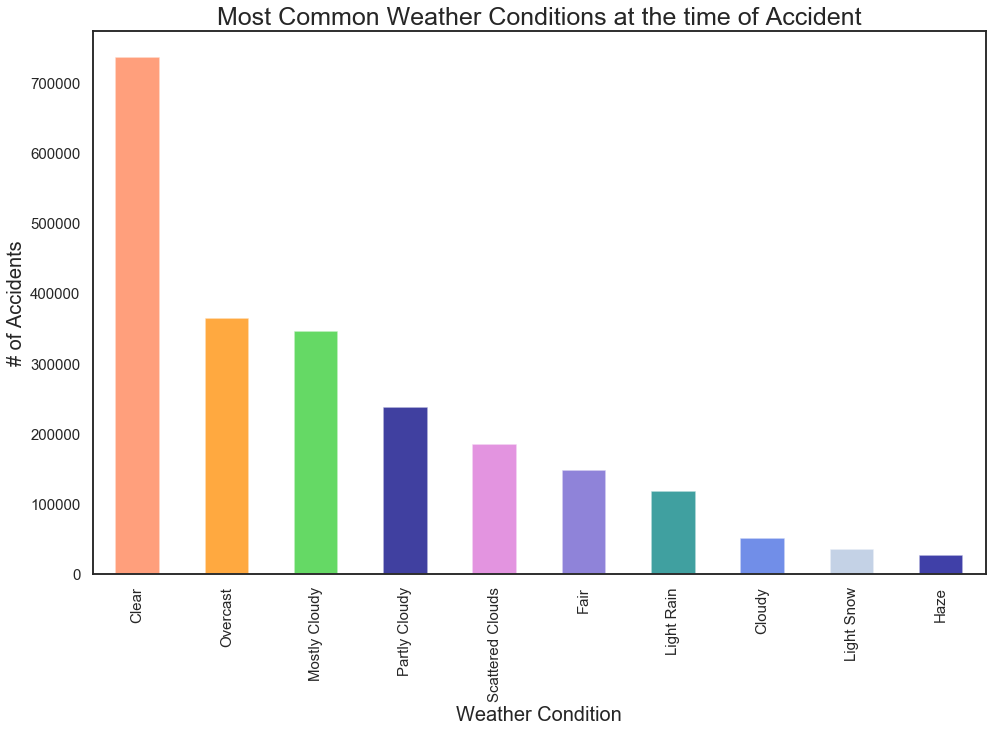

In [51]:
sns.set(style="white", context="talk")

fig, ax = plt.subplots(figsize=(16,10)) 
data_year['Weather_Condition'].value_counts().head(10).plot.bar(color = ['coral', 
                                                                         'darkorange',
                                                                         'limegreen', 
                                                                         'navy', 
                                                                         'orchid',
                                                                         'slateblue',
                                                                        'teal',
                                                                        'royalblue',
                                                                        'lightsteelblue',
                                                                        'darkblue'],
                                                               alpha = 0.75)
plt.xlabel('Weather Condition', fontsize = 20)
plt.ylabel('# of Accidents', fontsize = 20)
ax.tick_params(labelsize= 15)
plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.title('Most Common Weather Conditions at the time of Accident', fontsize = 25)

Here, I used Seaborn to plot the Top 10 most common Weather Conditions at the time of an accident. Suprisingly "clear" weather conditions were most commonly reported when an accident took place. 

-----------------------------------------------------------------------------

#### Time of Day Analysis 

Following our analysis of the weather data, I decided to investigate if time of day has an effect on both accident severity and the number of accidents.

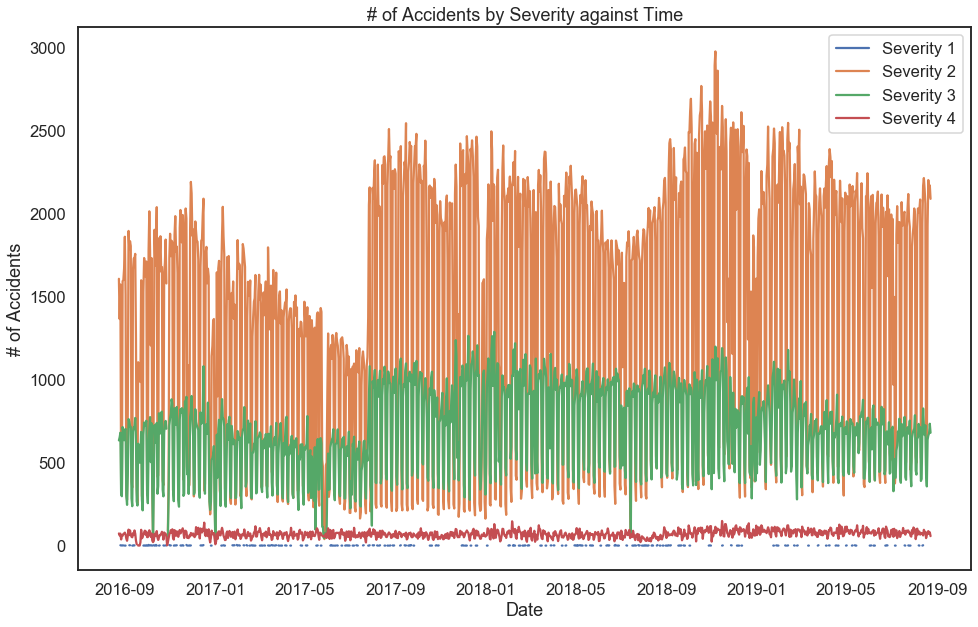

In [57]:
plt.figure(figsize=(16, 10))
plt.plot(sev_count.Start_Time, sev_count[1], label = 'Severity 1', markevery = 5)
plt.plot(sev_count.Start_Time, sev_count[2], label = 'Severity 2', markevery = 5)
plt.plot(sev_count.Start_Time, sev_count[3], label = 'Severity 3', markevery = 5)
plt.plot(sev_count.Start_Time, sev_count[4], label = 'Severity 4', markevery = 5)

plt.xlabel('Date')
plt.ylabel('# of Accidents')
plt.title('# of Accidents by Severity against Time')
plt.legend()
plt.show()

This rather spikey graph illustrates the number of accidents against the timeframe we are investigating, catagorised by the severity. 

As you can see from the above plot, the greatest number of accidents are considered Severity 2, followed by Severity 3 and 4. There are barely any Severity 1 accidents, as this suggests that perhaps the definition of an accident isn't always clear and perhaps many are unreported.

Here, I zoom in on a smaller timeframe to investigate the nature of the peaks and troughs. 

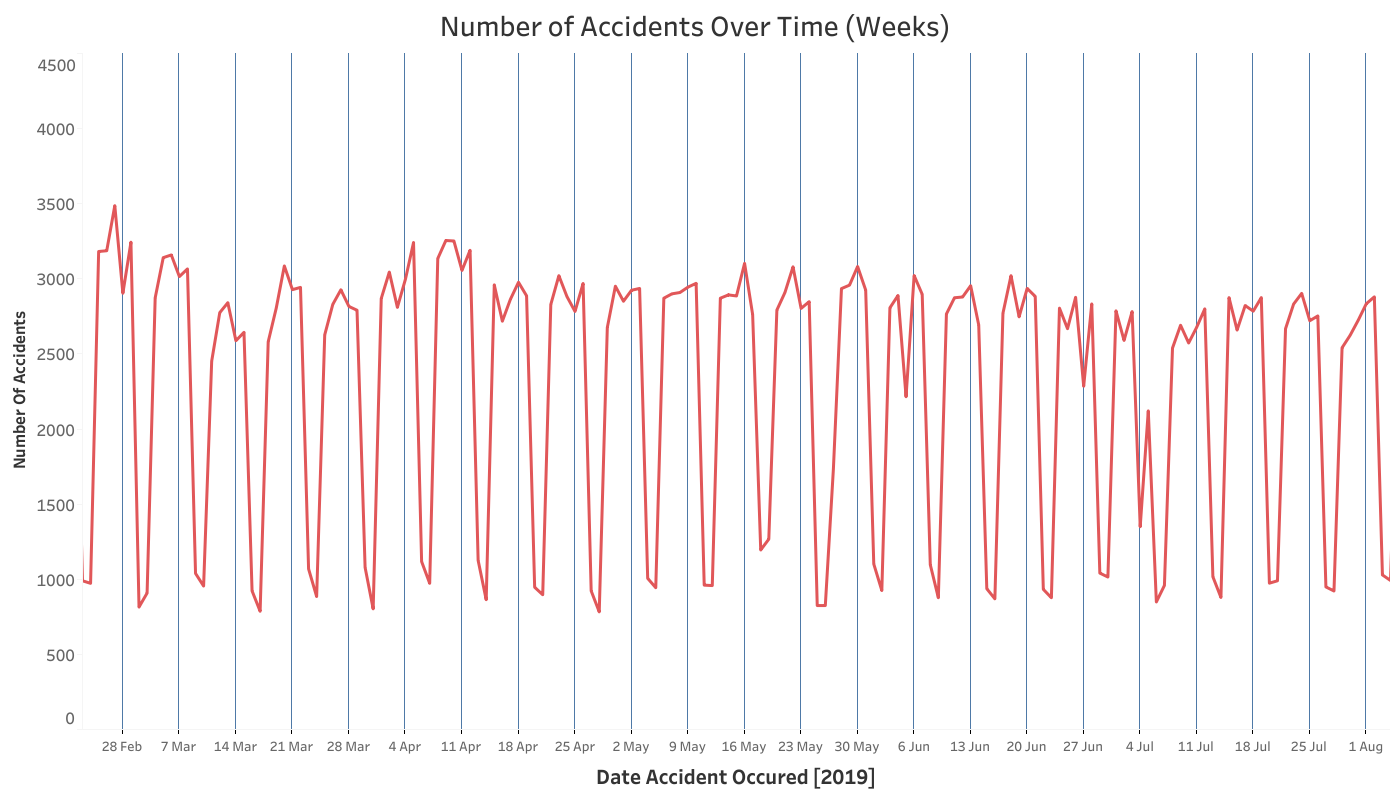

In [58]:
Image(filename = r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\your-project\Visuals\Accidents Weekly.png")

From checking my calendar, I was able to see that the peaks and dips corresponding to weekdays and weekends respectively. This makes sense as less people tend to travel on the weekend and perhaps drivers are in less of a rush to get to work. If we zoom in further, perhaps we can see this better.

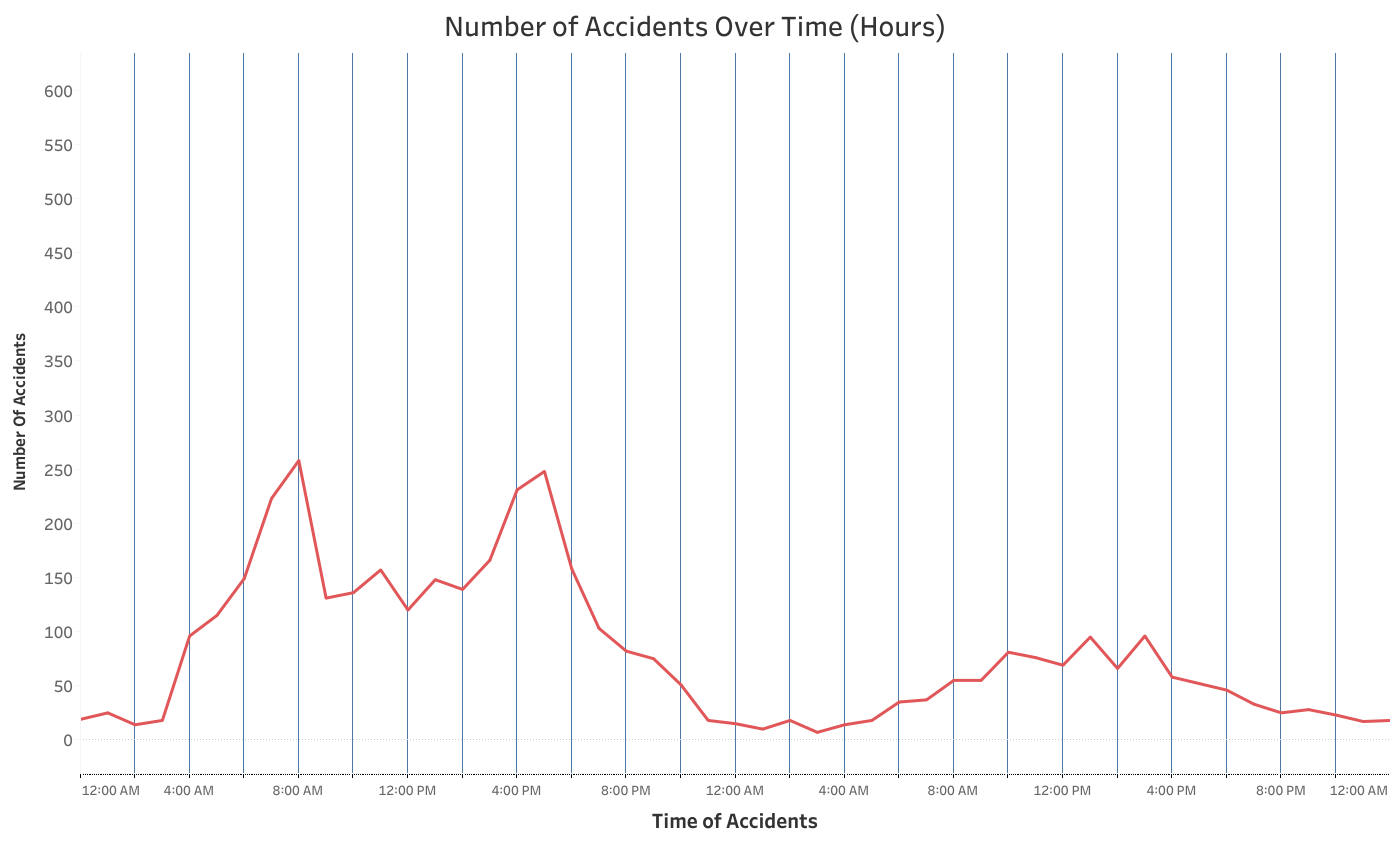

In [59]:
Image(filename = r"C:\Users\Gareth\Desktop\Ironhack\Week_Five\Project-Week-5-Your-Own-Project\your-project\Visuals\Accidents Hourly.png")

As we stipulated, around 8pm and 5pm, the greatest number of accidents occurs. We can attribute this perhaps to rush hour. On the right side of the graph, we can see the effect that a weekend has on the number of accidents.

### Part 5: Correlation

In order to investigate further, I analysed the data set by using "GetDummies". Get Dummies converts categorical data into 1's or Zero's. This allows us to make a correlation between a piece of data that was previously assigned to a string, and a numeric value (Severity)

Firstly, we needed to do some cleaning of the data. In the Weather Conditions column, frequently those describing the weather would collate weather types together, for example "Sand / Dust Whirlwinds / Windy", thus this would result errors in our data. Thus, using string splicing on the "/", we're able to seperate out all the weather conditions into their own individual column.

In [60]:
data_year['Weather_Condition 1'] = data_year['Weather_Condition'].str.split('/').str[0].str.strip()
data_year['Weather_Condition 2'] = data_year['Weather_Condition'].str.split('/').str[1].str.strip()
data_year['Weather_Condition 3'] = data_year['Weather_Condition'].str.split('/').str[2].str.strip()
#data_year['Weather_Condition 4'] = data_year['Weather_Condition'].str.split('and').str[3]
#data_year['Weather_Condition 5'] = data_year['Weather_Condition'].str.split('and').str[4]
data_year.head()

C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
5030,A-5031,MapQuest,201.0,2,2016-11-30,2016-11-30 16:55:13,37.112854,-122.115540,NaN,NaN,0.01,Accident on CA-9 at Alta Via Dr.,12089.0,Highway 9,L,Boulder Creek,Santa Cruz,CA,95006-9406,US,US/Pacific,KSJC,2016-11-30 15:53:00,53.1,NaN,89.0,30.09,10.0,WNW,9.2,0.02,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mostly Cloudy,NaN,NaN
5031,A-5032,MapQuest,201.0,2,2016-11-30,2016-11-30 16:58:07,38.019100,-121.942009,NaN,NaN,0.01,Accident on CA-4 Westbound at Exits 20A 20B Ba...,NaN,CA-4 W,R,Pittsburg,Contra Costa,CA,94565,US,US/Pacific,KCCR,2016-11-30 14:53:00,55.0,NaN,69.0,30.05,10.0,North,8.1,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mostly Cloudy,NaN,NaN
5032,A-5033,MapQuest,241.0,2,2016-11-30,2016-11-30 17:03:35,39.467312,-121.526367,NaN,NaN,0.00,Lane blocked due to accident on Lower Wyandott...,5981.0,Lower Wyandotte Rd,L,Oroville,Butte,CA,95966-9301,US,US/Pacific,KOVE,2016-11-30 15:53:00,54.0,NaN,66.0,30.12,10.0,WNW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mostly Cloudy,NaN,NaN
5033,A-5034,MapQuest,201.0,3,2016-11-30,2016-11-30 17:12:12,38.583015,-121.503220,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,NaN,CA-16 W,R,Sacramento,Sacramento,CA,95814,US,US/Pacific,KSAC,2016-11-30 15:53:00,52.0,NaN,80.0,30.10,10.0,NW,8.1,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,Mostly Cloudy,NaN,NaN
5034,A-5035,MapQuest,245.0,2,2016-11-30,2016-11-30 17:21:00,38.454681,-121.399796,NaN,NaN,0.01,Two lanes blocked and right hand shoulder bloc...,8245.0,Calvine Rd,R,Sacramento,Sacramento,CA,95828-9309,US,US/Pacific,KSAC,2016-11-30 15:53:00,52.0,NaN,80.0,30.10,10.0,NW,8.1,NaN,Mostly Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Mostly Cloudy,NaN,NaN


Let's see if it worked.

In [62]:
data_year.loc[data_year['Weather_Condition'] == 'Sand / Dust Whirlwinds / Windy']

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition 1,Weather_Condition 2,Weather_Condition 3
796573,A-796582,MapQuest,201.0,2,2019-07-11,2019-07-11 18:30:12,33.553162,-112.151573,NaN,NaN,0.0,Accident on 43rd Ave at Northern Ave.,8002.0,N 43rd Ave,L,Glendale,Maricopa,AZ,85302-6601,US,US/Mountain,KGEU,2019-07-11 16:58:00,111.0,111.0,8.0,28.60,10.0,WSW,22.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy
796576,A-796585,MapQuest,201.0,2,2019-07-11,2019-07-11 17:53:21,33.379162,-111.753967,NaN,NaN,0.0,Accident on Baseline Rd at Val Vista Dr.,NaN,E Baseline Rd,R,Gilbert,Maricopa,AZ,85234,US,US/Mountain,KIWA,2019-07-11 17:50:00,109.0,109.0,9.0,28.34,10.0,WNW,24.0,0.0,Sand / Dust Whirlwinds / Windy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,Sand,Dust Whirlwinds,Windy


Following this, we merge the Severity and the Weather Conditions 1, 2, 3 into a new dataset, from which we can create dummies. We also drop nan's and clean data while we're at it.

In [63]:
df_unmerged = data_year[['Severity',
                         'Weather_Condition 1',
                         'Weather_Condition 2',
                         'Weather_Condition 3']]
df_unmerged = df_unmerged.loc[df_unmerged['Weather_Condition 1'].notna()]
df_unmerged.drop(columns = ['Weather_Condition 2', 'Weather_Condition 3'], inplace = True)
dummies = pd.get_dummies(df_unmerged)
dummies.head()

,Severity,Weather_Condition 1_Blowing Dust,Weather_Condition 1_Blowing Snow,Weather_Condition 1_Clear,Weather_Condition 1_Cloudy,Weather_Condition 1_Drizzle,Weather_Condition 1_Drizzle and Fog,Weather_Condition 1_Dust Whirls,Weather_Condition 1_Fair,Weather_Condition 1_Fog,Weather_Condition 1_Freezing Rain,Weather_Condition 1_Funnel Cloud,Weather_Condition 1_Hail,Weather_Condition 1_Haze,Weather_Condition 1_Heavy Blowing Snow,Weather_Condition 1_Heavy Drizzle,Weather_Condition 1_Heavy Freezing Drizzle,Weather_Condition 1_Heavy Freezing Rain,Weather_Condition 1_Heavy Ice Pellets,Weather_Condition 1_Heavy Rain,Weather_Condition 1_Heavy Rain Showers,Weather_Condition 1_Heavy Smoke,Weather_Condition 1_Heavy Snow,Weather_Condition 1_Heavy Snow with Thunder,Weather_Condition 1_Heavy T-Storm,Weather_Condition 1_Heavy Thunderstorms and Rain,Weather_Condition 1_Heavy Thunderstorms and Snow,Weather_Condition 1_Heavy Thunderstorms with Small Hail,Weather_Condition 1_Ice Pellets,Weather_Condition 1_Light Blowing Snow,Weather_Condition 1_Light Drizzle,Weather_Condition 1_Light Fog,Weather_Condition 1_Light Freezing Drizzle,Weather_Condition 1_Light Freezing Fog,Weather_Condition 1_Light Freezing Rain,Weather_Condition 1_Light Hail,Weather_Condition 1_Light Haze,Weather_Condition 1_Light Ice Pellets,Weather_Condition 1_Light Rain,Weather_Condition 1_Light Rain Shower,Weather_Condition 1_Light Rain Showers,Weather_Condition 1_Light Rain with Thunder,Weather_Condition 1_Light Snow,Weather_Condition 1_Light Snow Grains,Weather_Condition 1_Light Snow Showers,Weather_Condition 1_Light Snow and Sleet,Weather_Condition 1_Light Snow with Thunder,Weather_Condition 1_Light Thunderstorm,Weather_Condition 1_Light Thunderstorms and Rain,Weather_Condition 1_Light Thunderstorms and Snow,Weather_Condition 1_Low Drifting Snow,Weather_Condition 1_Mist,Weather_Condition 1_Mostly Cloudy,Weather_Condition 1_N,Weather_Condition 1_Overcast,Weather_Condition 1_Partly Cloudy,Weather_Condition 1_Patches of Fog,Weather_Condition 1_Rain,Weather_Condition 1_Rain Shower,Weather_Condition 1_Rain Showers,Weather_Condition 1_Sand,Weather_Condition 1_Scattered Clouds,Weather_Condition 1_Shallow Fog,Weather_Condition 1_Showers in the Vicinity,Weather_Condition 1_Small Hail,Weather_Condition 1_Smoke,Weather_Condition 1_Snow,Weather_Condition 1_Snow Grains,Weather_Condition 1_Snow Showers,Weather_Condition 1_Snow and Sleet,Weather_Condition 1_Snow and Thunder,Weather_Condition 1_Squalls,Weather_Condition 1_T-Storm,Weather_Condition 1_Thunder,Weather_Condition 1_Thunder and Hail,Weather_Condition 1_Thunder in the Vicinity,Weather_Condition 1_Thunderstorm,Weather_Condition 1_Thunderstorms and Rain,Weather_Condition 1_Thunderstorms and Snow,Weather_Condition 1_Tornado,Weather_Condition 1_Volcanic Ash,Weather_Condition 1_Widespread Dust,Weather_Condition 1_Wintry Mix
5030,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5031,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5032,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5033,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5034,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, we have the data we need to carry out our correlation analysis. 

Below, the code describes a for loop which loops throughout the columns of the dummies list, analysing the 
correlation values between the severity column and the column that we're currently looping through. The loop checks if the value of correlation is above or below 0.01, and returns
the value of both the column and correlation value to seperate empty lists. It then prints the correlation between the weather condition and Severity.

In [64]:
columns = list(dummies.columns)
columns.remove('Severity')

correlation_values = []
weather_types = []

for column in columns:
    corr = dummies['Severity'].corr(dummies[column])
    if corr >= 0.01 or corr <= -0.01:
        print(f'The correlation for {column} = {corr}')
        print('------------------------------------------------------')
        weather_types.append(column)
        correlation_values.append(corr)

The correlation for Weather_Condition 1_Clear = -0.01062025610222614
------------------------------------------------------
The correlation for Weather_Condition 1_Fair = -0.019425413302366305
------------------------------------------------------
The correlation for Weather_Condition 1_Light Freezing Rain = 0.010865859055709052
------------------------------------------------------
The correlation for Weather_Condition 1_Light Rain = 0.010624881780794395
------------------------------------------------------
The correlation for Weather_Condition 1_Light Snow = 0.02583726601606222
------------------------------------------------------
The correlation for Weather_Condition 1_Rain = 0.010703213163316285
------------------------------------------------------
The correlation for Weather_Condition 1_Snow = 0.010952443777725912
------------------------------------------------------


Text(0, 0.5, 'Correlation')

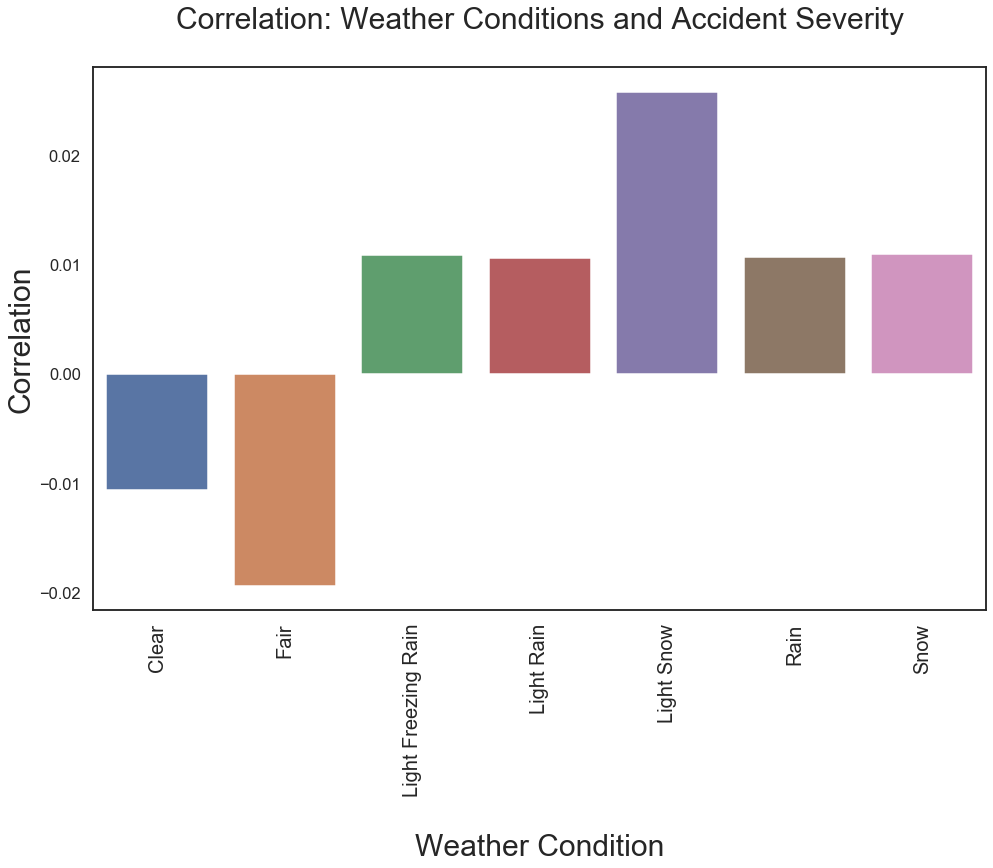

In [65]:
weather_types = [item.replace('Weather_Condition 1_','') for item in weather_types]
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
sns.barplot(x = weather_types, y = correlation_values)
plt.xticks(rotation=90)
plt.title('Correlation: Weather Conditions and Accident Severity\n', fontsize = 30)
plt.xlabel('\nWeather Condition', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('Correlation', fontsize = 30)

To summarise, this ultimately suggests that despite the fact that accidents during Clear or Fair days may be more common, typically their accident severities are generally lower than those of accidents which occur during Rain / Snow or Light Snow conditions. 

#### Seatbelts

The use of seatbelts in the USA is regulated on a per state basis, with some states have a strict adoption policy, whilst others have a weaker policy. For example, New Hampshire has a seatbelt useage rate of 68%, while California reports a useage of 97%. 

Does this have any correlation with the number of accidents that occur per state?

Slope:  13215.363956424482
Intercept:  -1041044.4801827433
rvalue:  0.42411500654096795
pvalue:  0.004592594591738942
stderr:  4407.009358314533


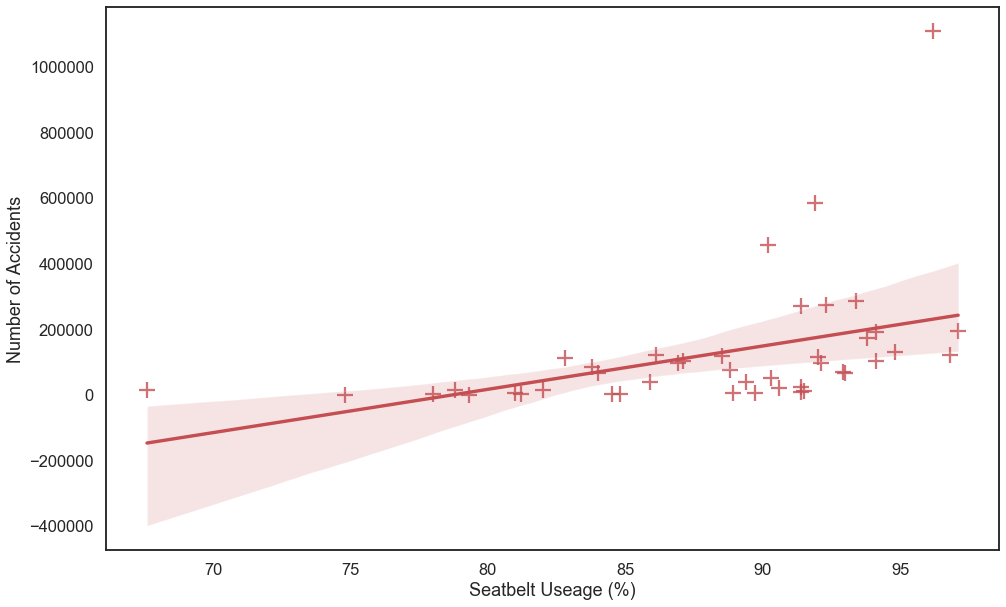

In [74]:
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
x = df_states_full['Seatbelt']
y = df_states_full['Severity']
ax = sns.regplot(x, y, 
                  data = df_states_full, scatter_kws = {"s": 250},
                  marker = "+", color = 'r')
ax.set(xlabel = "Seatbelt Useage (%)", ylabel = "Number of Accidents")
result = stats.linregress(x, y)
print("Slope: ", result.slope)
print("Intercept: ", result.intercept)
print("rvalue: ", result.rvalue)
print("pvalue: ", result.pvalue)
print("stderr: ", result.stderr)

Based on the P-Value, the correlation is very low. However, evidently our dataset has some large outliers, particularly with the higher region of accidents. As a result, I decided to remove the outliers to investigate if the correlation is more prominent. 

Slope:  6896.106765537881
Intercept:  -526839.1454016197
rvalue:  0.5495825452483445
pvalue:  0.00023966141802435494
stderr:  1700.5688167819071


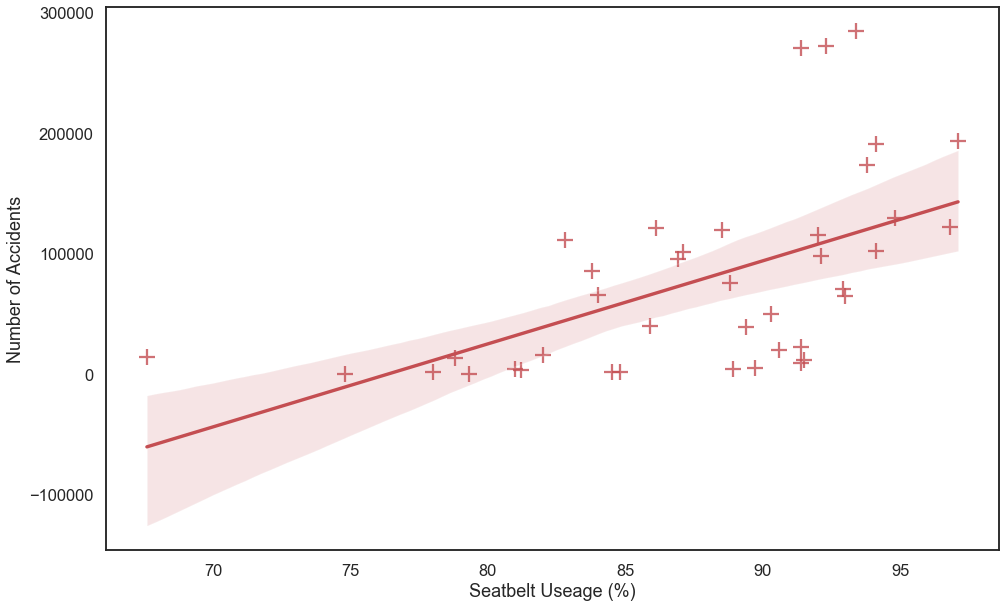

In [73]:
df_states_nooutlier = df_states_full.drop([0, 1, 2])
df_states_nooutlier.head()
df_states_nooutlier.Seatbelt = df_states_full.Seatbelt.astype(str).astype(float)
sns.set(style="white", context="talk")
fig, ax = plt.subplots(figsize=(16,10)) 
x = df_states_nooutlier['Seatbelt']
y = df_states_nooutlier['Severity']
ax = sns.regplot(x, y, 
                  data = df_states_nooutlier,
                  scatter_kws = {"s": 250},
                  marker = "+", color = 'r')
ax.set(xlabel = "Seatbelt Useage (%)", ylabel = "Number of Accidents")
result = stats.linregress(x, y)
print("Slope: ", result.slope)
print("Intercept: ", result.intercept)
print("rvalue: ", result.rvalue)
print("pvalue: ", result.pvalue)
print("stderr: ", result.stderr)

The P-value has increased, demonstrating that there is perhaps a correlation between the seatbelt useage.

### Part 6: Hypothesis Testing

#### Hypothesis : The Average Severity of Car Accidents in the USA is above 2.5

In [75]:
st, p_value =  stats.ttest_1samp(data['Severity'], 2.5)

In [81]:
print(st, p_value)

-795.7497672553656 0.0


In [78]:
data['Severity'].mean()

2.360190092911525

##### Reject hypothesis : doesn't really work because the variance of the data is very low.

---------------

#### Hypothesis, the average distance that an accident affects the road would be one mile. 

In [79]:
st, p_value =  stats.ttest_1samp(data['Distance(mi)'], 1)

In [80]:
print(st, p_value)

-795.7497672553656 0.0


In [82]:
data['Distance(mi)'].mean()

0.2855653569462776

##### Reject hypothesis, average accident distance is less than one mile

---------------

#### Hypothesis: Severities of Four result in accidents that are 1.4 miles long.

In [87]:
data.loc[data.Severity == 4]['Distance(mi)'].mean()
st, p_value =  stats.ttest_1samp(data.loc[data.Severity == 4]['Distance(mi)'], 1.4)
print(st, p_value)

24.766460401466276 5.701732427349463e-135


##### Hypothesis can be rejected

---------------

### Part 7: Future Work

In future, I would like to analyse wherever rates of driving under the influence have an effect on car accidents. The data set, aquired from Backgroundchecks, could be used to calculate correlation data against accident severity, or accident number, on a state by state basis. 


In [89]:
DUI = pd.read_html('https://backgroundchecks.org/which-states-have-the-worst-dui-problems.html')
DUI[0].head(5)

,Rank,State,DUI Arrests,DUI Arrest Rate (per 100K),DUI Fatalities,Rate of Total Traffic Deaths,DUI Fatalities Increase/Decrease over Prior Year,DUI Death Rate (per 100K),DUI Severity Score
0,1,Wyoming,3432,676.10,34,30%,-26.10%,5.89,12.65
1,2,South Dakota,5891,721.93,45,35%,25%,5.10,12.32
2,3,Montana,3794,381.24,79,43%,38.60%,7.44,11.25
3,4,North Dakota,5136,678.35,29,27%,-38.30%,3.82,10.60
4,5,Mississippi,5370,462.21,163,25%,6.50%,5.46,10.08


I would also like to analyse the following. 
- Correlation between time of year and accident severity
- Normalise the data relative to the size of the state or the population of state.
- Extrapolating the data with another accident dataset to make comparisons.
- Compare differences in road traffic accidents in the USA and Europe.

### Part 8: Conclusions

- The analysis of a large set of data takes some extensive pre-planning as it's quite easy to get lost amongst all the potential questions. I decided that by pre-planning my questions and objectives, I was able to meet the majority of my goals within the timeframe.


- Sometimes the results were surprising because you expect clearer correlations between bad weather and the number of accidents. However, it's worth noting that the occurence of bad weather is typically less common than good weather, depending on which state you're in. Factors such as population density, road useage, road conditions and the numbers of drivers per state could have significant impacts on the number of accidents that occur.


- Giving advice based on data can be difficult given that even accident reporting can be subjective without a clear understanding of the system utilised. For example, the lack of Severity 1 accidents suggests that there's probably an unreporting of more minor accidents, whilst the abundance of Severity 2 accidents suggest that perhaps those that report accidents may only report them if they feel they're worth it and bump them up a category.


- Despite this, analysing data for trends over time is quite interesting. In the aforementioned severity vs time plot, it's plain to see where weekends and weekdays have an impact on the number of accidents, likely due to the changes in the numbers of road users. Also, it's apparent when public holidays occur such as Christmas, there are significantly less accidents.